# Final project


You are a team of data scientists and ML engineers working for a recipe website.

Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.


Your team's job is to build a model that calssifies whether a nutirtional content is either of the below three catgories
- Criteria for **"Nourishing"**: High in protein and/or fiber, low in saturated fat and sugar, not excessively high in calories.
- Criteria for **"Indulgent"**: High in sugars or saturated fats, very low in beneficial nutrients like protein and fiber, or very high in calories.
- **"Balanced"** is for foods that fall between "Nourishing" and "Indulgent".


# Data

You are provided train and test datasets with the target value as **"Health Category"**

This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values ​​are based on a 100g serving. Here is a description of the columns:

- **FDC_ID** : A unique identifier for each food item in the database.
- **Item** : The name or description of the food product.
- **Category** : The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories** : The energy content of the food, presented in kilocalories (kcal).
- **Protein** : The protein content of the food, measured in grams.
- **Carbohydrate** : The carbohydrate content of the food, measured in grams.
- **Total fat** : The total fat content of the food, measured in grams.
- **Cholesterol** : The cholesterol content of the food, measured in milligrams.
- **Fiber** : The dietary fiber content of the food, measured in grams.
- **Water** : The water content of the food, measured in grams.
- **Alcohol** : The alcohol content of the food (if any), measured in grams.
- **Vitamin C** : The Vitamin C content of the food, measured in milligrams.
- **Health Category** : Categorizing the nutitonal contents  


# Project Delivarables
 1. Investigate and experiment with different classification models using the training data. This involves assessing various algorithms to determine the most suitable option based on our dataset's characteristics. (Save the model weights)
 2. Emphasize a thorough exploration and understanding of the dataset. 
 3. EDA
 4. Provide a detailed explanation of the strategies implemented to address issues related to missing values and imbalanced datasets.
 5. Feature Engineering
 6. A function to test your model at the end of your jupyter notebook

 

## Evaluation 
1. Each team is required to save the predictions from their best model on the test data and submit a CSV file containing a single column of predictions, labeled "predictions". This file should reflect the outcomes generated by your most effective model.
2. I will evaluate your predictions against the actual test set to determine the F1 scores. The F1 score, a measure of a model's accuracy, balances precision and recall, providing a comprehensive assessment of performance.
3. The team whose model performs better wins. Each member of the winning team gets to drop their lowest homework grade.

# Submission:
- The notebook must contain the `predict()` function.
- Each team should submit the following
    - Model pickel file
    - Single Jupyter Notebook in HTML and ipynb format
    - Complete Report in PDF
    - Presentation deck 


In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [340]:
df= pd.read_csv('train_df.csv')
df.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0 mg,11.3,9.31 g,0.0 g,12.0 mg,Indulgent
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0 mg,0.0,62.64 g,0.0 g,0.0 mg,Indulgent
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0 mg,0.7,88.52 g,0.0 g,5.8 mg,Indulgent
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0 mg,0.0,67.93 g,0.0 g,0.0 mg,Balanced
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0 mg,1.0,89.1 g,NaN,61.0 mg,Indulgent


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FDC_ID           1558 non-null   int64  
 1   Item             1558 non-null   object 
 2   Category         1558 non-null   object 
 3   Calories         1558 non-null   float64
 4   Protein          1558 non-null   float64
 5   Carbohydrate     1558 non-null   float64
 6   Total fat        1558 non-null   float64
 7   Cholesterol      1490 non-null   object 
 8   Fiber            1448 non-null   float64
 9   Water            1558 non-null   object 
 10  Alcohol          1091 non-null   object 
 11  Vitamin C        1480 non-null   object 
 12  Health Category  1558 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 158.4+ KB


In [342]:
df.shape

(1558, 13)

In [343]:
#Removing mg and  g in dataset
columns_to_replace = ['Cholesterol', 'Water', 'Alcohol', 'Vitamin C']
df[columns_to_replace]=df[columns_to_replace].replace('mg|g',"",regex=True).apply(pd.to_numeric)
df

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0,11.3,9.31,0.0,12.0,Indulgent
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,0.0,Indulgent
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,0.0,5.8,Indulgent
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,0.0,Balanced
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0,1.0,89.10,NaN,61.0,Indulgent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,171692,"Apples, dried, sulfured, stewed, without added...",Fruits and Fruit Juices,57.0,0.22,15.32,0.07,0.0,2.0,84.13,0.0,1.0,Balanced
1554,168909,"Noodles, japanese, somen, cooked",Cereal Grains and Pasta,131.0,4.00,27.54,0.18,0.0,NaN,67.91,NaN,0.0,Balanced
1555,168831,"Puddings, lemon, dry mix, regular",Sweets,363.0,0.10,91.80,0.50,0.0,0.1,5.20,NaN,0.0,Indulgent
1556,174349,"Game meat, raccoon, cooked, roasted","Lamb, Veal, and Game Products",255.0,29.20,0.00,14.50,97.0,0.0,54.30,0.0,0.0,Balanced


In [344]:
df.dtypes

FDC_ID               int64
Item                object
Category            object
Calories           float64
Protein            float64
Carbohydrate       float64
Total fat          float64
Cholesterol        float64
Fiber              float64
Water              float64
Alcohol            float64
Vitamin C          float64
Health Category     object
dtype: object

In [345]:
df.Item

0                               Spices, poultry seasoning
1       Beef, plate steak, boneless, outside skirt, se...
2       Soup, tomato rice, canned, prepared with equal...
3       Lamb, Australian, imported, fresh, leg, bottom...
4                                            Pummelo, raw
                              ...                        
1553    Apples, dried, sulfured, stewed, without added...
1554                     Noodles, japanese, somen, cooked
1555                    Puddings, lemon, dry mix, regular
1556                  Game meat, raccoon, cooked, roasted
1557                Sauce, sweet and sour, ready-to-serve
Name: Item, Length: 1558, dtype: object

In [346]:
#Missing values
df.isna().sum()

FDC_ID               0
Item                 0
Category             0
Calories             0
Protein              0
Carbohydrate         0
Total fat            0
Cholesterol         68
Fiber              110
Water                0
Alcohol            467
Vitamin C           78
Health Category      0
dtype: int64

In [347]:
from sklearn.impute import SimpleImputer
fill_cholesterol = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_fiber = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_alcohol = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
fill_vitamin_c = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df['Cholesterol'] = fill_cholesterol.fit_transform(df[['Cholesterol']])
df['Fiber'] = fill_fiber.fit_transform(df[['Fiber']])
df['Alcohol'] = fill_alcohol.fit_transform(df[['Alcohol']])
df['Vitamin C'] = fill_vitamin_c.fit_transform(df[['Vitamin C']])

In [348]:
df.isnull().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol        0
Fiber              0
Water              0
Alcohol            0
Vitamin C          0
Health Category    0
dtype: int64

In [349]:
df.duplicated().sum()

0

In [350]:
df.drop(columns=['FDC_ID','Alcohol'], inplace=True)

In [351]:
df.head()

,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C,Health Category
0,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0,11.3,9.31,12.0,Indulgent
1,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,Indulgent
2,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,5.8,Indulgent
3,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,Balanced
4,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0,1.0,89.10,61.0,Indulgent


In [352]:
numerical_columns =[column for column in df.columns if df[column].dtype != 'O']
categorical_columns =[column for column in df.columns if df[column].dtype == 'O']

In [353]:
df[numerical_columns].describe()

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,220.541720,11.953806,19.226341,10.912991,43.011409,2.023135,56.042908,8.708023
std,170.851821,10.778995,25.274504,16.602603,110.705001,4.110376,29.685042,74.260352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.250000,2.182500,0.000000,0.800000,0.000000,0.000000,38.000000,0.000000
50%,179.000000,9.055000,7.600000,5.100000,10.000000,0.500000,64.590000,0.000000
75%,319.000000,20.495000,26.570000,13.972500,68.000000,2.023135,78.300000,3.000000
max,900.000000,88.320000,99.100000,100.000000,2195.000000,44.500000,100.000000,2732.000000


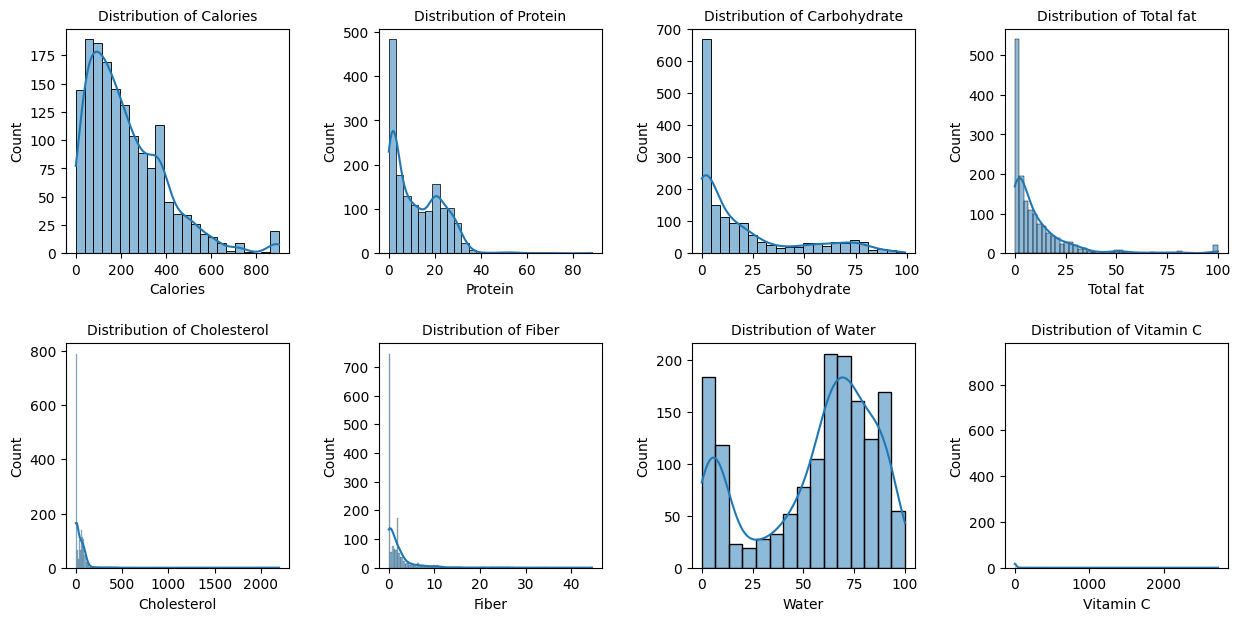

In [354]:
figure,axes= plt.subplots(2,4,figsize =(15,7))
figure.subplots_adjust(hspace=0.4, wspace=0.4)
for i,column in enumerate(numerical_columns):
    sns.histplot(df[column],kde=True,ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribution of {column}',fontsize =10)

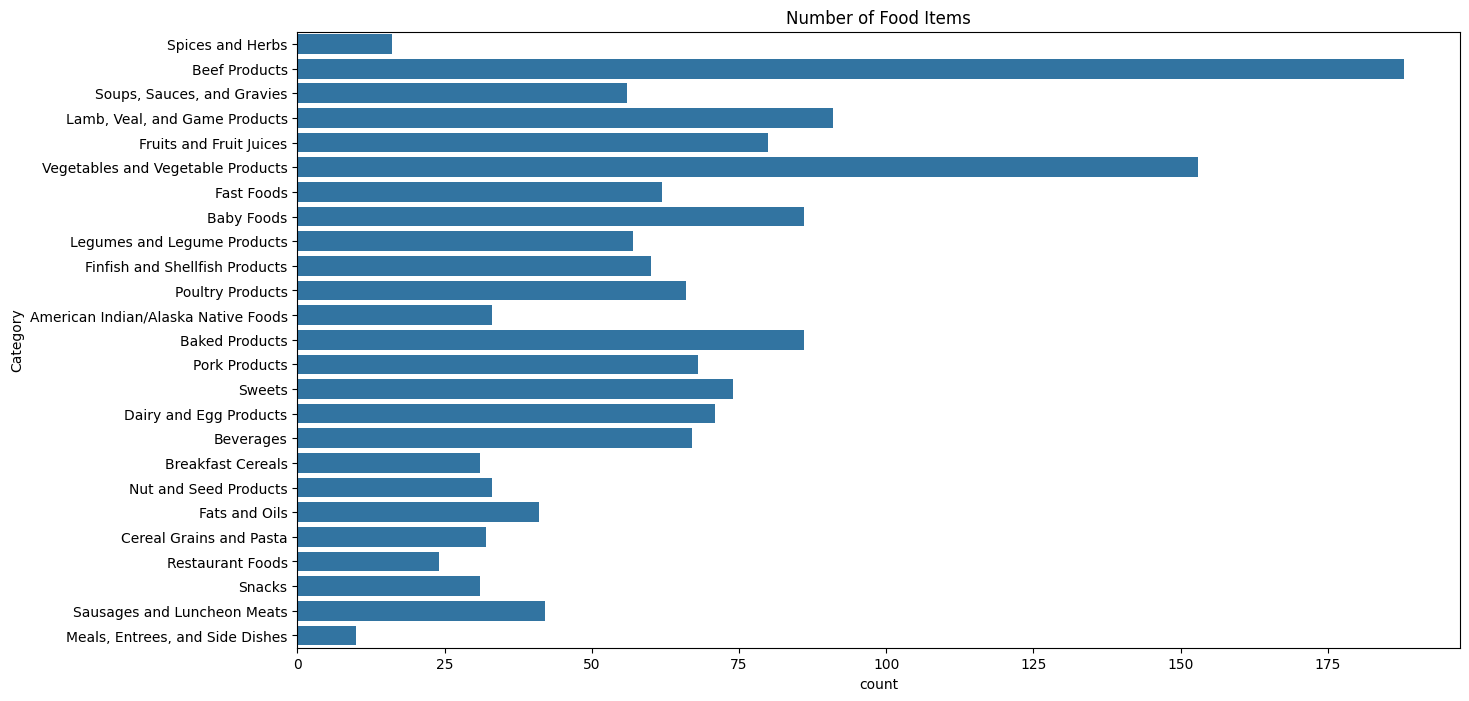

In [355]:
# UNIVARIATE PLOTS
plt.figure(figsize=(15,8))
sns.countplot(df['Category'])
plt.title('Number of Food Items')
plt.show()

Beef Product and Vegetable & Vegetable Product has high count in this Category (food items)

<Axes: xlabel='count', ylabel='Health Category'>

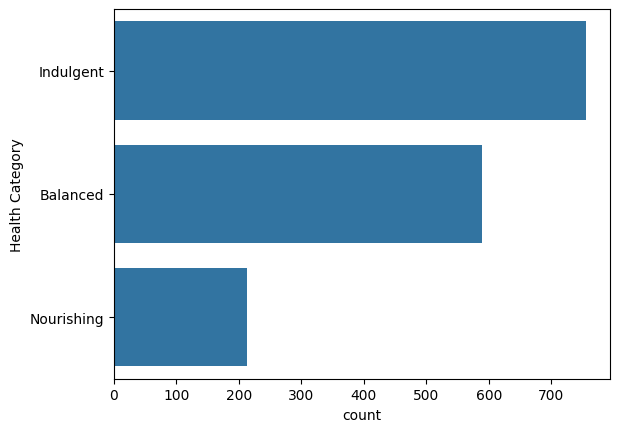

In [356]:
sns.countplot(df['Health Category'])

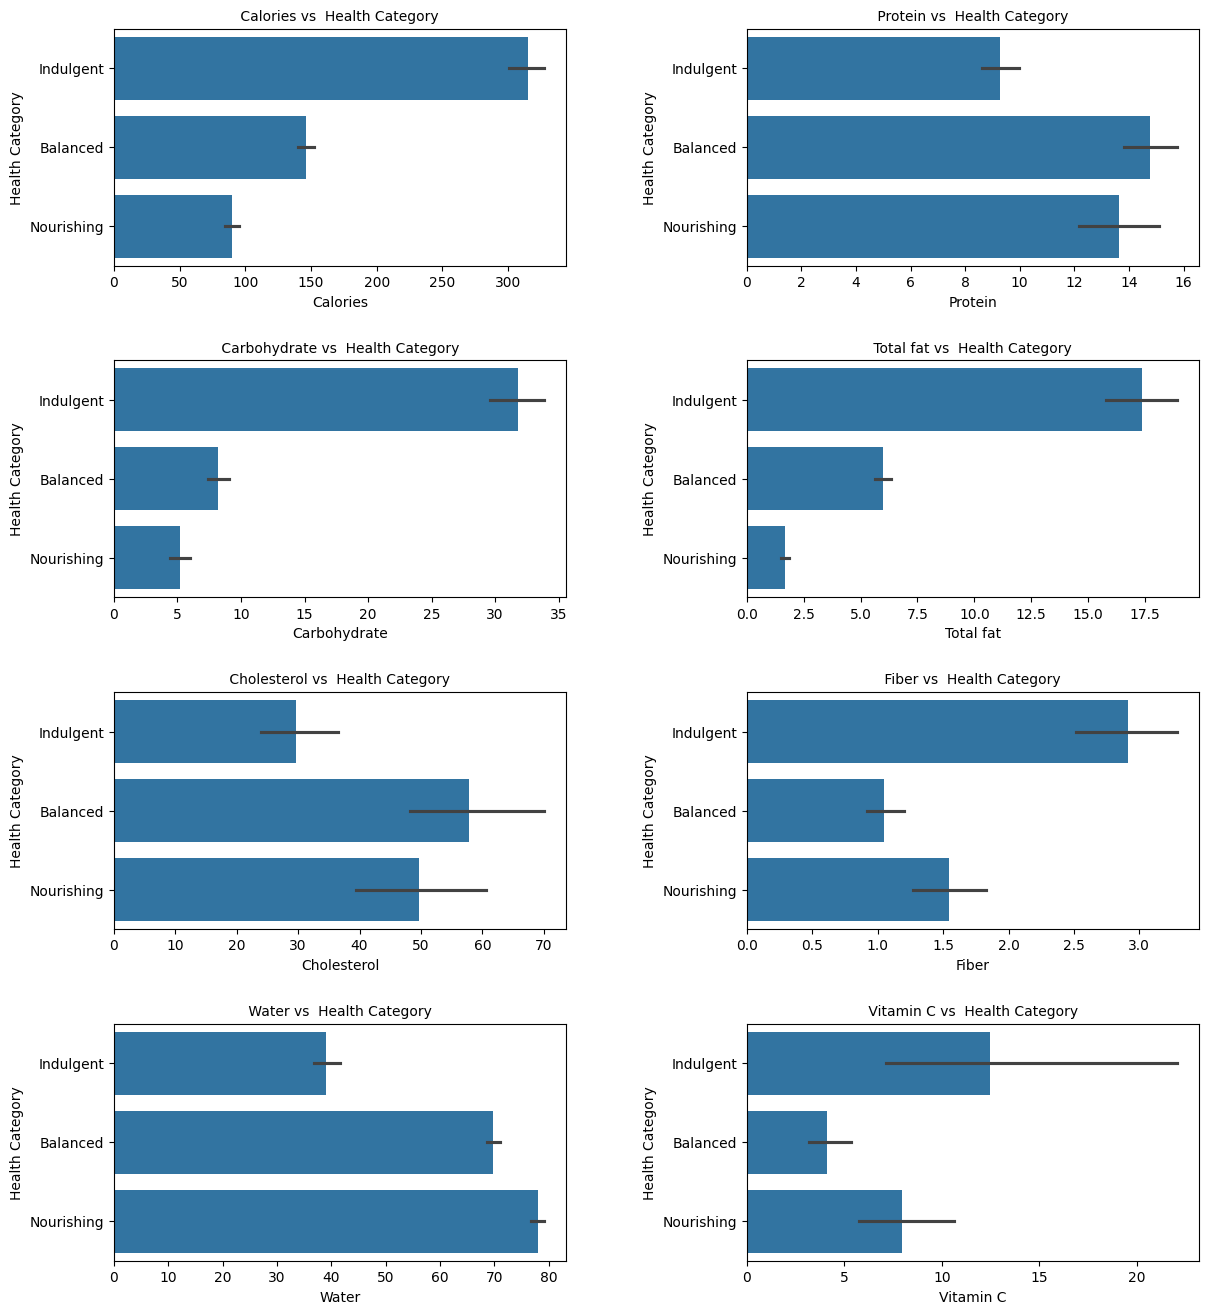

In [357]:
#Bivariate plots
# Numerical

fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(14, 16))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

axes = axes.flatten()
for i,column in enumerate(numerical_columns):
    sns.barplot(data=df,x=column,y='Health Category',ax=axes[i],)
    axes[i].set_title(f' {column} vs  Health Category ',fontsize =10)

<Axes: >

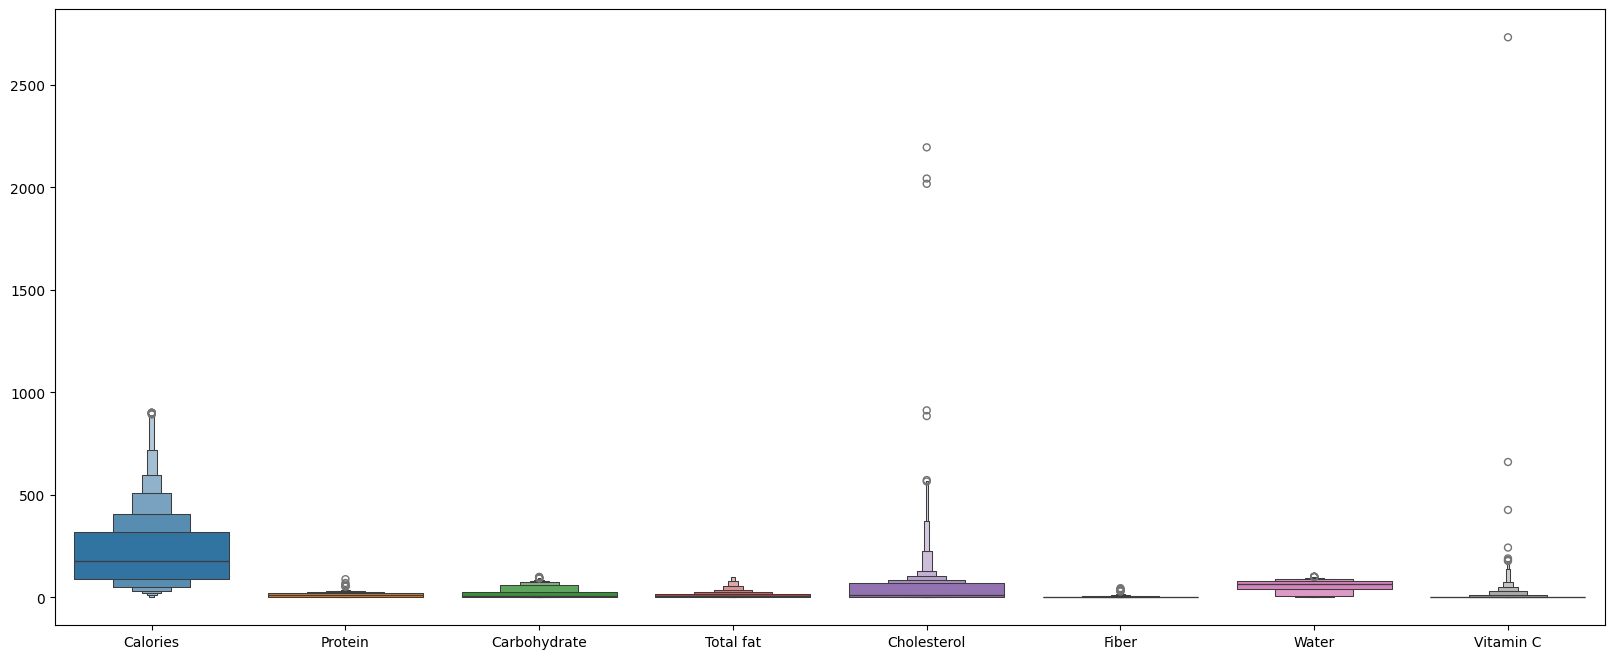

In [358]:
plt.figure(figsize = (20,8))
sns.boxenplot(df[numerical_columns])


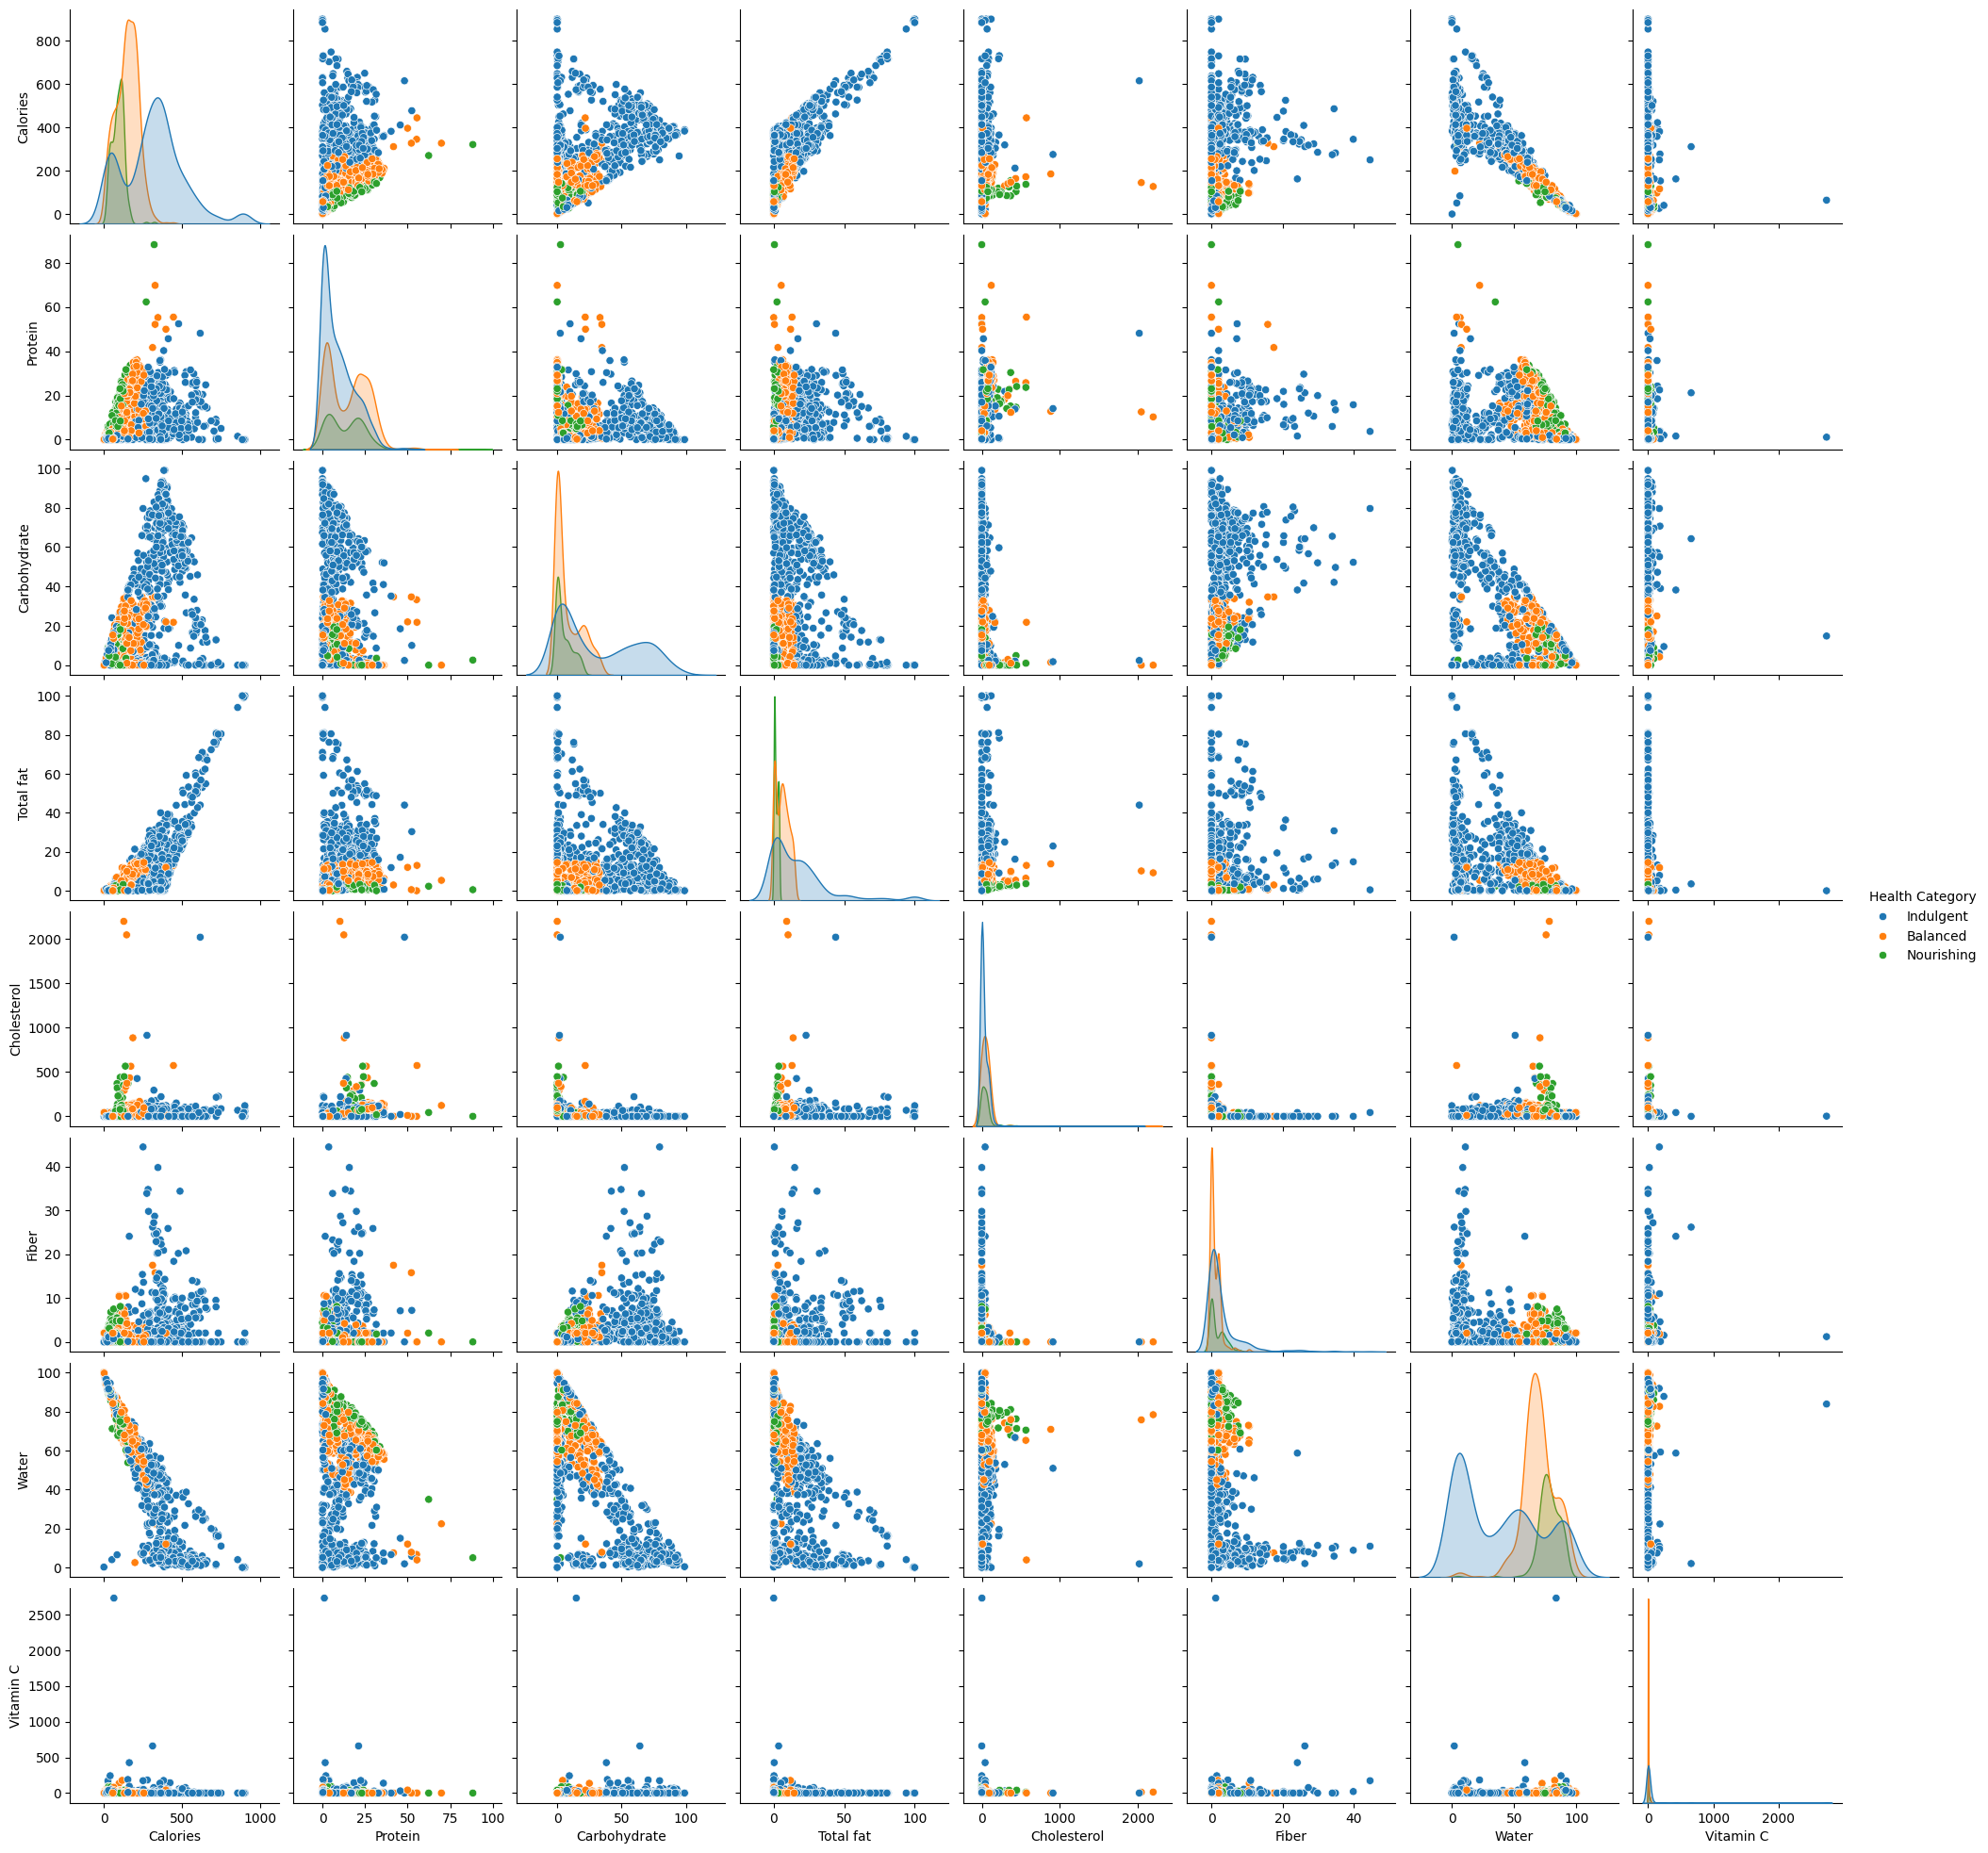

In [359]:
sns.pairplot(df, hue = 'Health Category')

In [360]:
df.describe()

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,220.541720,11.953806,19.226341,10.912991,43.011409,2.023135,56.042908,8.708023
std,170.851821,10.778995,25.274504,16.602603,110.705001,4.110376,29.685042,74.260352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.250000,2.182500,0.000000,0.800000,0.000000,0.000000,38.000000,0.000000
50%,179.000000,9.055000,7.600000,5.100000,10.000000,0.500000,64.590000,0.000000
75%,319.000000,20.495000,26.570000,13.972500,68.000000,2.023135,78.300000,3.000000
max,900.000000,88.320000,99.100000,100.000000,2195.000000,44.500000,100.000000,2732.000000


<Axes: ylabel='Vitamin C'>

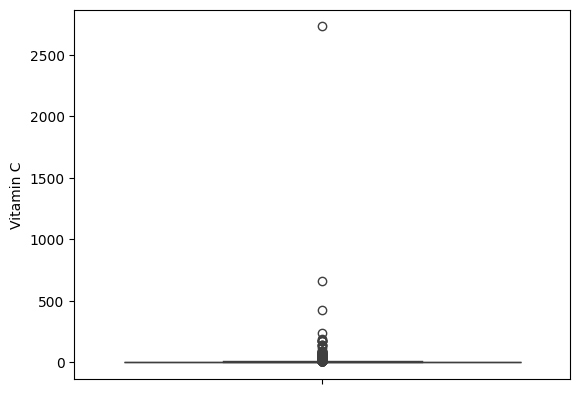

In [361]:
sns.boxplot(df['Vitamin C'])

In [362]:
# Handling Outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 -Q1
print(Q1,Q3,IQR)

Calories        88.2500
Protein          2.1825
Carbohydrate     0.0000
Total fat        0.8000
Cholesterol      0.0000
Fiber            0.0000
Water           38.0000
Vitamin C        0.0000
Name: 0.25, dtype: float64 Calories        319.000000
Protein          20.495000
Carbohydrate     26.570000
Total fat        13.972500
Cholesterol      68.000000
Fiber             2.023135
Water            78.300000
Vitamin C         3.000000
Name: 0.75, dtype: float64 Calories        230.750000
Protein          18.312500
Carbohydrate     26.570000
Total fat        13.172500
Cholesterol      68.000000
Fiber             2.023135
Water            40.300000
Vitamin C         3.000000
dtype: float64


In [363]:
df_filtered = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) |(df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)
df_filtered.head()

,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C,Health Category
0,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,Indulgent
1,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,5.8,Indulgent
2,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,Balanced
3,"Beef, shoulder top blade steak, boneless, sepa...",Beef Products,187.0,27.96,0.00,8.34,98.0,0.0,62.67,0.0,Balanced
4,"Beans, snap, canned, all styles, seasoned, sol...",Vegetables and Vegetable Products,16.0,0.83,3.49,0.20,0.0,1.5,94.30,3.1,Indulgent


In [364]:
df_filtered.shape

(987, 11)

<Axes: ylabel='Calories'>

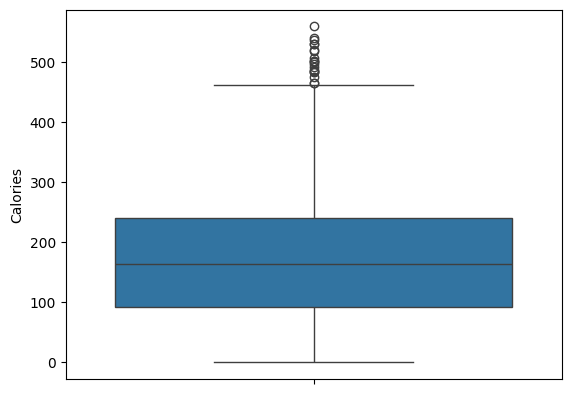

In [365]:
sns.boxplot(df_filtered['Calories'])

In [366]:
# Feature Engineering
df_filtered.head()

,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C,Health Category
0,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,Indulgent
1,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,5.8,Indulgent
2,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,Balanced
3,"Beef, shoulder top blade steak, boneless, sepa...",Beef Products,187.0,27.96,0.00,8.34,98.0,0.0,62.67,0.0,Balanced
4,"Beans, snap, canned, all styles, seasoned, sol...",Vegetables and Vegetable Products,16.0,0.83,3.49,0.20,0.0,1.5,94.30,3.1,Indulgent


In [368]:
# df_filtered['Calories_levels'] = pd.cut(df_filtered['Calories'], bins=3,labels=['low','medium','high'])

In [369]:
for col in numerical_columns:
    df_filtered[f'{col}_levels'] = pd.cut(x = df_filtered[col],bins= 2, labels= [0,1]).astype(int)

In [370]:
df_filtered.head()

,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C,Health Category,Calories_levels,Protein_levels,Carbohydrate_levels,Total fat_levels,Cholesterol_levels,Fiber_levels,Water_levels,Vitamin C_levels
0,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,Indulgent,0,0,0,1,0,0,1,0
1,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,5.8,Indulgent,0,0,0,0,0,0,1,1
2,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,Balanced,0,1,0,0,0,0,1,0
3,"Beef, shoulder top blade steak, boneless, sepa...",Beef Products,187.0,27.96,0.00,8.34,98.0,0.0,62.67,0.0,Balanced,0,1,0,0,1,0,1,0
4,"Beans, snap, canned, all styles, seasoned, sol...",Vegetables and Vegetable Products,16.0,0.83,3.49,0.20,0.0,1.5,94.30,3.1,Indulgent,0,0,0,0,0,0,1,0


In [371]:
df_encoded = pd.get_dummies(df_filtered['Category']).astype(bool).astype(int)
df_final = pd.concat([df_filtered, df_encoded], axis=1).drop('Category', axis = 1)
df_final['Health Category_encoded'] = df_final['Health Category'].map({'Nourishing': 0, 'Indulgent': 1, 'Balanced':2})
df_final = df_final.drop('Health Category', axis=1)



In [372]:
df_final.head()

,Item,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C,Calories_levels,...,Pork Products,Poultry Products,Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Spices and Herbs,Sweets,Vegetables and Vegetable Products,Health Category_encoded
0,"Beef, plate steak, boneless, outside skirt, se...",238.0,17.69,0.35,18.44,71.0,0.0,62.64,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,"Soup, tomato rice, canned, prepared with equal...",47.0,0.82,8.54,1.06,1.0,0.7,88.52,5.8,0,...,0,0,0,0,0,1,0,0,0,1
2,"Lamb, Australian, imported, fresh, leg, bottom...",187.0,20.97,0.00,11.43,63.0,0.0,67.93,0.0,0,...,0,0,0,0,0,0,0,0,0,2
3,"Beef, shoulder top blade steak, boneless, sepa...",187.0,27.96,0.00,8.34,98.0,0.0,62.67,0.0,0,...,0,0,0,0,0,0,0,0,0,2
4,"Beans, snap, canned, all styles, seasoned, sol...",16.0,0.83,3.49,0.20,0.0,1.5,94.30,3.1,0,...,0,0,0,0,0,0,0,0,1,1


In [384]:
X = df_final.drop(columns=['Item','Health Category_encoded'])
y = df_final['Health Category_encoded']

In [385]:
X.describe()

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Vitamin C,Calories_levels,Protein_levels,...,Nut and Seed Products,Pork Products,Poultry Products,Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Spices and Herbs,Sweets,Vegetables and Vegetable Products
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,175.310030,14.117416,10.261925,8.464843,45.667106,0.769671,65.399666,0.774975,0.157042,0.354610,...,0.003040,0.063830,0.060790,0.023303,0.032421,0.005066,0.048632,0.002026,0.031408,0.067882
std,108.901509,10.478198,15.660601,8.220363,39.141148,1.128817,19.773829,1.563838,0.364024,0.478637,...,0.055076,0.244573,0.239066,0.150940,0.177206,0.071030,0.215207,0.044992,0.174507,0.251672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,3.275000,0.000000,1.410000,2.000000,0.000000,57.430000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,164.000000,14.910000,1.890000,6.140000,48.000000,0.000000,67.310000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240.000000,22.565000,15.570000,13.240000,77.000000,1.500000,77.730000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560.000000,40.320000,66.400000,33.720000,168.000000,5.000000,100.000000,7.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [396]:
from sklearn.preprocessing import StandardScaler
Std_scaler =StandardScaler()
X_scaled = Std_scaler.fit_transform(X)

In [397]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(789, 41) (789,)
(198, 41) (198,)


In [436]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,auc,roc_curve

In [442]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [445]:
y_pred = lr.predict(X_test)
print(y_pred)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

[1 0 0 2 2 2 1 2 1 1 0 2 2 1 2 2 0 1 2 2 2 0 1 0 1 1 2 1 2 1 1 2 1 1 2 1 2
 2 0 1 1 2 2 0 0 2 2 1 0 1 2 0 1 2 2 2 1 0 0 1 1 2 2 1 1 2 2 2 1 2 0 2 1 2
 1 2 2 2 1 2 0 2 2 2 1 2 2 1 1 2 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 0 2 2 1 2 2
 2 2 2 2 2 2 1 1 1 1 2 1 0 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 0 1 2 1 2 1 2 2
 2 2 0 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 1 2 1 2 2 1 2 2 2 1 2 1 1 2 2 2 2
 1 2 2 2 1 2 0 2 0 1 0 2 1]
0.8686868686868687
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.83      0.90      0.86        59
           2       0.92      0.84      0.88       115

    accuracy                           0.87       198
   macro avg       0.84      0.89      0.86       198
weighted avg       0.88      0.87      0.87       198

[[22  0  2]
 [ 0 53  6]
 [ 7 11 97]]


In [461]:
# roc_auc= roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1],multi_class='ovo')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: multiclass format is not supported

In [406]:
#SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [407]:
y_pred = sv.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7878787878787878
              precision    recall  f1-score   support

           0       0.48      0.88      0.62        16
           1       0.75      0.84      0.79        57
           2       0.90      0.75      0.82       125

    accuracy                           0.79       198
   macro avg       0.71      0.82      0.74       198
weighted avg       0.82      0.79      0.79       198

[[14  0  2]
 [ 0 48  9]
 [15 16 94]]


In [408]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [409]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9848484848484849
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      1.00      1.00        64
           2       1.00      0.97      0.99       108

    accuracy                           0.98       198
   macro avg       0.97      0.99      0.98       198
weighted avg       0.99      0.98      0.99       198

[[ 26   0   0]
 [  0  64   0]
 [  3   0 105]]


In [410]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

In [421]:

training_score = rf.score(X_train, y_train)
print("Training Score:", training_score)
test_score = rf.score(X_test, y_test)
print("Test Score:", test_score)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

Training Score: 1.0
Test Score: 0.98989898989899
0.98989898989899
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      1.00      1.00        64
           2       1.00      0.98      0.99       107

    accuracy                           0.99       198
   macro avg       0.98      0.99      0.98       198
weighted avg       0.99      0.99      0.99       198

[[ 27   0   0]
 [  0  64   0]
 [  2   0 105]]
